In [1]:
using Revise
using ConvexHullPricing
using DataFrames
using Plots
using JLD2
using ProgressBars, JuMP, Gurobi

const UT = ConvexHullPricing.Utilitaries
const OPT = ConvexHullPricing.Optimizer

Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-03
Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-03


ConvexHullPricing.Optimizer

In [2]:
UltraOptimalRunsBE = load_object("UltraOptimalRunsBE.jld2")

8-element Vector{Any}:
 Vector{Any}[[47.91343195446234, 47.359194429735226, 47.2031424483049, 45.60491262197729, 45.35030130215489, 45.347429659485556, 45.36965650696072, 45.23949450766145, 45.39850340280452, 40.34800171468544  …  45.145951966627536, 33.8400175224358, 49.34713843892507, 54.246453432992666, 45.78337713392966, 45.02428645007319, 51.004310012714654, 46.569695882153724, 46.601726393734566, 45.6330147804465], [[48.0159, 47.5826818275154, 47.431412120693594, 47.33785608676959, 45.27678260425666, 45.299383233061526, 45.320751613406806, 45.34095493086859, 45.36005670788052, 43.11914329211949  …  48.35177508412134, 44.2396, 47.44628270034852, 50.73908613056071, 47.97323533682511, 46.71954870469635, 52.325996153846155, 47.78080384615385, 47.19335817375385, 45.35089174478725], [26.308358815964084, -33.75456016793652, -340.21775495214206, -28.335111008679974, -146.50365196494477, -193.35132675448705, 191.54970123442536, 70.42460050979514, -62.57083467906159, -200.89250356600388  …

In [9]:
BEinstances = []
for file in readdir("C:\\Users\\Sofiane\\Desktop\\ConvexHullPricing\\data\\belgian"; join=true)
    push!(BEinstances, UT.load_data(file))
end

In [15]:
ObjM = Float64[]
for instance in BEinstances
    push!(ObjM, UT.Matching(instance).Obj)
end

In [47]:
maximum(UltraOptimalRunsBE[I][3])

-2.790687385798879e9

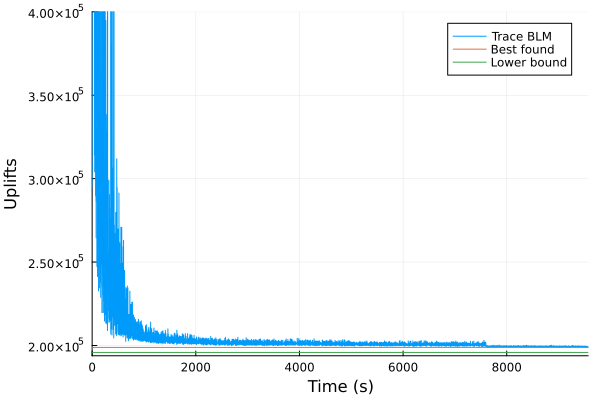

In [72]:
I = 7
plot(UltraOptimalRunsBE[I][4][2:end], ObjM[I] .- UltraOptimalRunsBE[I][3][1:end], label = "Trace BLM")
hline!([ObjM[I] - maximum(UltraOptimalRunsBE[I][3])], label = "Best found")
hline!([ObjM[I] - maximum(UltraOptimalRunsBE[I][3]) - 3000], label = "Lower bound")
plot!(xlims = (0, UltraOptimalRunsBE[I][4][end]),ylims=(ObjM[I] - maximum(UltraOptimalRunsBE[I][3]) - 5000,4e5))
plot!(xlabel = "Time (s)", ylabel = "Uplifts")